In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
%matplotlib inline
import json
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [86]:
# import pandas as pd 
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_curve
# import matplotlib
# import matplotlib.pyplot as plt
# from IPython.display import display, HTML
# import matplotlib.patches as mpatches
# import seaborn as sns
# sns.set()
# from matplotlib import style
# from matplotlib.backends.backend_pdf import PdfPages
# %matplotlib inline
# # plt.style.use('fivethirtyeight')
# #plt.style.use(['ggplot'])
# %config IPCompleter.greedy=True
# #plt.style.use(['dark_background'])
# plt.style.use('seaborn-dark')
# #import json

In [87]:
US_csv = pd.read_csv("USvideos.csv")

In [88]:
def makeDataFrame(jsonData):
    listOfId=[]
    listOfGenre=[]
    for i in jsonData['items']:
        listOfId.append(i['id'])
        listOfGenre.append(i['snippet']['title'])

    genreIds={}
    genreIds['category_id']=listOfId
    genreIds['Genre']=listOfGenre
    genreDf=pd.DataFrame.from_dict(genreIds)
    return genreDf

In [89]:
US_csv['publish_hour']=US_csv['publish_time']

In [90]:
US_csv['comments_disabled'].value_counts()

False    28290
True       460
Name: comments_disabled, dtype: int64

In [91]:
#clean df- drop thumbnail link as not used in our analysis
US_youtube_df = US_csv.drop(['thumbnail_link'], axis=1)

In [92]:
#Checking for null values
US_csv.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               463
publish_hour                0
dtype: int64

In [93]:
#Convert empty description values to 0
US_csv['description'] = US_csv[['description']].replace('none', 0)

In [94]:
# Set publish time as a date time.
US_youtube_df['publish_time']= pd.to_datetime(US_youtube_df['publish_time'])
# store just the date as publish_date
US_youtube_df['publish_date']= US_youtube_df['publish_time'].dt.date
# store just the time as publish_timeOfDay
US_youtube_df['publish_timeOfDay'] = US_youtube_df['publish_time'].dt.time
# drop the original publish time value
US_youtube_df= US_youtube_df.drop('publish_time', 1)

In [95]:
# concatenate the information from the json file about category into the main dataframe
US_json = pd.read_json("US_category_id.json")

US_json= makeDataFrame(US_json)

US_json['category_id']=US_json['category_id'].astype(int)

fullDf=pd.merge(US_youtube_df , US_json, left_on='category_id', right_on='category_id',how='left')

In [96]:
# drop catgory id. We now have genre in it's place
fullDf=fullDf.drop('category_id', 1)

In [97]:
fullDf

video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
5      gHZ1Qz0KiKM      17.14.11   
6      39idVpFF7NQ      17.14.11   
7      nc99ccSXST0      17.14.11   
8      jr9QtXwC9vc      17.14.11   
9      TUmyygCMMGA      17.14.11   
10     9wRQljFNDW8      17.14.11   
11     VifQlJit6A0      17.14.11   
12     5E4ZBSInqUU      17.14.11   
13     GgVmn66oK_A      17.14.11   
14     TaTleo4cOs8      17.14.11   
15     kgaO45SyaO4      17.14.11   
16     ZAQs-ctOqXQ      17.14.11   
17     YVfyYrEmzgM      17.14.11   
18     eNSN6qet1kE      17.14.11   
19     B5HORANmzHw      17.14.11   
20     vU14JY3x81A      17.14.11   
21     6VhU_T463sU      17.14.11   
22     _-aDHxoblr4      17.14.11   
23     JBZTZZAcFTw      17.14.11   
24     lZ68j2J_GOM      17.14.11   
25     dRpNZV18N_g      17.14.11   
26     fcVjitaM3LY      17.14.11   
27     qeWvgZLz9yU      17.14.11   
28     iIxy3JN3-jc      17.14.11   
29     n30k5CwLhS4      17.14.11   
30     U0hAC8O7RoI      17.14.11   
31     CBVGjS_EJok      17.14.11   
32     n1WpP7iowLc      17.14.11   
33     hz7ukDjuq4w      17.14.11   
34     p2hJxyF7mok      17.14.11   
35     0mlNzVSJrT0      17.14.11   
36     Om_zGhJLZ5U      17.14.11   
37     e_7zHm7GsYc      17.14.11   
38     dQvIbulWCM4      17.14.11   
39     zZ9FciUx6gs      17.14.11   
40     PaJCFHXcWmM      17.14.11   
41     goP4Z5wyOlM      17.14.11   
42     NZFhMSgbKKM      17.14.11   
43     0tO_l_Ed5Rs      17.14.11   
44     STI2fI7sKMo      17.14.11   
45     BWPrk9PUwQE      17.14.11   
46     ogYum4kWXgk      17.14.11   
47     sbcbvuitiTc      17.14.11   
48     zNqCVTs38nU      17.14.11   
49     DM-ni_LSOFE      17.14.11   
50     0PpNlNJ6Nng      17.14.11   
51     c-3JxzN2u34      17.14.11   
52     069D0NmW39o      17.14.11   
53     9t9u_yPEidY      17.14.11   
54     KODzih-pYlU      17.14.11   
55     8NHA23f7LvU      17.14.11   
56     w0XYVssCKjw      17.14.11   
57     9XSULcLI6Hg      17.14.11   
58     pjuPpVLXDQg      17.14.11   
59     9xSx-5tmq44      17.14.11   
60     4v0nOAzcG2A      17.14.11   
61     oTObwUiXdYY      17.14.11   
62     1cgK-BIrXes      17.14.11   
63     ujyTQNNjjDU      17.14.11   
64     PABlVzeldaM      17.14.11   
65     6340tX9M_eM      17.14.11   
66     8mhTWqWlQzU      17.14.11   
67     t4YAyT4ihIQ      17.14.11   
68     MNiweoKXwfg      17.14.11   
69     Jw1Y-zhQURU      17.14.11   
70     2Vv-BfVoq4g      17.14.11   
71     UFYCTJlayS4      17.14.11   
72     cccyOn99s4Y      17.14.11   
73     abGCYPCk294      17.14.11   
74     lY_0mkYDZDU      17.14.11   
75     k8NxqyGcZA4      17.14.11   
76     IE-xepGLVt8      17.14.11   
77     ObIQ0s02UHg      17.14.11   
78     cOc3tsFWoRs      17.14.11   
79     AJYb0Yom5UQ      17.14.11   
80     gLswXiRLdkA      17.14.11   
81     MyEqfBkzESU      17.14.11   
82     wJYE0sFOteE      17.14.11   
83     L_5_slz4ke4      17.14.11   
84     OKoL852K9uA      17.14.11   
85     pa_oUisZZy0      17.14.11   
86     fNtLIcyjsnI      17.14.11   
87     _Iz83-Cmt6A      17.14.11   
88     YlvCVbfS9M0      17.14.11   
89     arJ5h2TY3I4      17.14.11   
90     -2RVw2_QyxQ      17.14.11   
91     gEHCXl4J9Qo      17.14.11   
92     -OK9i1_YYYc      17.14.11   
93     b4vTZx_AtHk      17.14.11   
94     kOnQocd799Y      17.14.11   
95     e4FApt6z55c      17.14.11   
96     2XK4omx9uMU      17.14.11   
97     xfmipNU4Odc      17.14.11   
98     jp9hK-jY6yY      17.14.11   
99     RkHuWjiR-LM      17.14.11   
100    fCTKDn3Q8xQ      17.14.11   
101    DIU3xPdhCBI      17.14.11   
102    wnwF1FHybDQ      17.14.11   
103    9oFP-pOMNwE      17.14.11   
104    pz95u3UVpaM      17.14.11   
105    g5c1bk8weaQ      17.14.11   
106    yuBqWcSKrCk      17.14.11   
107    x9mh-SwSKas      17.14.11   
108    uiA4B5Y63IQ      17.14.11   
109    viyRD5z6ilQ      17.14.11   
110    QFfEtKv

In [98]:
fullDf['publish_hour']= pd.to_datetime(fullDf['publish_hour'])

In [99]:
fullDf['UploadYearMonth'] = fullDf['publish_date'].map(lambda x: 100*x.year + x.month)

In [100]:
uploadMonths=fullDf['UploadYearMonth'].unique()

In [101]:
fullDf[[ 'UploadYearMonth', 'Genre']].groupby('UploadYearMonth').count()

Genre
UploadYearMonth       
200607               1
200804               4
200806               4
200808               3
200903               2
200906               1
200909               3
200912               8
201001               2
201004               2
201005               9
201009               6
201103               8
201105              13
201108               2
201111               4
201201               2
201202               2
201203               3
201206               1
201209               3
201212              13
201303               9
201305              13
201307               6
201309               3
201310               9
201311               4
201401               2
201402               2
201403               8
201406               8
201408               7
201412               5
201501               4
201503               3
201504               3
201505               2
201506               1
201507               3
201509              11
201510               8
201605               8
201606               7
201610               8
201611               5
201612               7
201702               7
201703               7
201704               6
201705               1
201706               3
201708              14
201709               8
201710              37
201711            4196
201712            6149
201801            5492
201802            6196
201803            6006
201804             386

Videos generally trend within 6 months of upload in germany, very few videos older than this trended in this dataset.

# Investigate Trend time

In [102]:
# fix badly formatted date data 
fullDf['trendingYear']=fullDf['trending_date'].str.split('.').str[0].str.replace("1", '201')
fullDf['trendingMonth']=fullDf['trending_date'].str.split('.').str[2]
fullDf['trendingDay']=fullDf['trending_date'].str.split('.').str[1]

In [103]:
fullDf['trending_date']=fullDf['trendingYear'].astype(str)+'-'+fullDf['trendingMonth']+'-'+fullDf['trendingDay']

In [104]:
fullDf=fullDf.drop(['trendingDay','trendingMonth', 'trendingYear' ], 1)

In [105]:
fullDf

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
5      gHZ1Qz0KiKM    2017-11-14   
6      39idVpFF7NQ    2017-11-14   
7      nc99ccSXST0    2017-11-14   
8      jr9QtXwC9vc    2017-11-14   
9      TUmyygCMMGA    2017-11-14   
10     9wRQljFNDW8    2017-11-14   
11     VifQlJit6A0    2017-11-14   
12     5E4ZBSInqUU    2017-11-14   
13     GgVmn66oK_A    2017-11-14   
14     TaTleo4cOs8    2017-11-14   
15     kgaO45SyaO4    2017-11-14   
16     ZAQs-ctOqXQ    2017-11-14   
17     YVfyYrEmzgM    2017-11-14   
18     eNSN6qet1kE    2017-11-14   
19     B5HORANmzHw    2017-11-14   
20     vU14JY3x81A    2017-11-14   
21     6VhU_T463sU    2017-11-14   
22     _-aDHxoblr4    2017-11-14   
23     JBZTZZAcFTw    2017-11-14   
24     lZ68j2J_GOM    2017-11-14   
25     dRpNZV18N_g    2017-11-14   
26     fcVjitaM3LY    2017-11-14   
27     qeWvgZLz9yU    2017-11-14   
28     iIxy3JN3-jc    2017-11-14   
29     n30k5CwLhS4    2017-11-14   
30     U0hAC8O7RoI    2017-11-14   
31     CBVGjS_EJok    2017-11-14   
32     n1WpP7iowLc    2017-11-14   
33     hz7ukDjuq4w    2017-11-14   
34     p2hJxyF7mok    2017-11-14   
35     0mlNzVSJrT0    2017-11-14   
36     Om_zGhJLZ5U    2017-11-14   
37     e_7zHm7GsYc    2017-11-14   
38     dQvIbulWCM4    2017-11-14   
39     zZ9FciUx6gs    2017-11-14   
40     PaJCFHXcWmM    2017-11-14   
41     goP4Z5wyOlM    2017-11-14   
42     NZFhMSgbKKM    2017-11-14   
43     0tO_l_Ed5Rs    2017-11-14   
44     STI2fI7sKMo    2017-11-14   
45     BWPrk9PUwQE    2017-11-14   
46     ogYum4kWXgk    2017-11-14   
47     sbcbvuitiTc    2017-11-14   
48     zNqCVTs38nU    2017-11-14   
49     DM-ni_LSOFE    2017-11-14   
50     0PpNlNJ6Nng    2017-11-14   
51     c-3JxzN2u34    2017-11-14   
52     069D0NmW39o    2017-11-14   
53     9t9u_yPEidY    2017-11-14   
54     KODzih-pYlU    2017-11-14   
55     8NHA23f7LvU    2017-11-14   
56     w0XYVssCKjw    2017-11-14   
57     9XSULcLI6Hg    2017-11-14   
58     pjuPpVLXDQg    2017-11-14   
59     9xSx-5tmq44    2017-11-14   
60     4v0nOAzcG2A    2017-11-14   
61     oTObwUiXdYY    2017-11-14   
62     1cgK-BIrXes    2017-11-14   
63     ujyTQNNjjDU    2017-11-14   
64     PABlVzeldaM    2017-11-14   
65     6340tX9M_eM    2017-11-14   
66     8mhTWqWlQzU    2017-11-14   
67     t4YAyT4ihIQ    2017-11-14   
68     MNiweoKXwfg    2017-11-14   
69     Jw1Y-zhQURU    2017-11-14   
70     2Vv-BfVoq4g    2017-11-14   
71     UFYCTJlayS4    2017-11-14   
72     cccyOn99s4Y    2017-11-14   
73     abGCYPCk294    2017-11-14   
74     lY_0mkYDZDU    2017-11-14   
75     k8NxqyGcZA4    2017-11-14   
76     IE-xepGLVt8    2017-11-14   
77     ObIQ0s02UHg    2017-11-14   
78     cOc3tsFWoRs    2017-11-14   
79     AJYb0Yom5UQ    2017-11-14   
80     gLswXiRLdkA    2017-11-14   
81     MyEqfBkzESU    2017-11-14   
82     wJYE0sFOteE    2017-11-14   
83     L_5_slz4ke4    2017-11-14   
84     OKoL852K9uA    2017-11-14   
85     pa_oUisZZy0    2017-11-14   
86     fNtLIcyjsnI    2017-11-14   
87     _Iz83-Cmt6A    2017-11-14   
88     YlvCVbfS9M0    2017-11-14   
89     arJ5h2TY3I4    2017-11-14   
90     -2RVw2_QyxQ    2017-11-14   
91     gEHCXl4J9Qo    2017-11-14   
92     -OK9i1_YYYc    2017-11-14   
93     b4vTZx_AtHk    2017-11-14   
94     kOnQocd799Y    2017-11-14   
95     e4FApt6z55c    2017-11-14   
96     2XK4omx9uMU    2017-11-14   
97     xfmipNU4Odc    2017-11-14   
98     jp9hK-jY6yY    2017-11-14   
99     RkHuWjiR-LM    2017-11-14   
100    fCTKDn3Q8xQ    2017-11-14   
101    DIU3xPdhCBI    2017-11-14   
102    wnwF1FHybDQ    2017-11-14   
103    9oFP-pOMNwE    2017-11-14   
104    pz95u3UVpaM    2017-11-14   
105    g5c1bk8weaQ    2017-11-14   
106    yuBqWcSKrCk    2017-11-14   
107    x9mh-SwSKas    2017-11-14   
108    uiA4B5Y63IQ    2017-11-14   
109    viyRD5z6ilQ    2017-11-14   
110    QFfEtKv

In [54]:
fullDf['trending_date']= pd.to_datetime(fullDf['trending_date'])

In [55]:
fullDf['publish_hour']=pd.to_datetime(fullDf['publish_hour'])

In [56]:
fullDf['timefromUploadToTrending']=fullDf['trending_date']-fullDf['publish_hour']

In [57]:
fullDf.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      2966          15954              False             False   
1      6146          12703              False             False   
2      5339           8181              False             False   
3       666           2146              False             False   
4      1989          17518              False             False   

   video_error_or_removed                                        description  \
0                   False  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
1                   False  One year after the presidential election, John...   
2                   False  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   
3                   False  Today we find out if Link is a Nickelback amat...   
4                   False  I know it's been a while since we did this sho...   

         publish_hour publish_date publish_timeOfDay           Genre  \
0 2017-11-13 17:13:01   2017-11-13          17:13:01  People & Blogs   
1 2017-11-13 07:30:00   2017-11-13          07:30:00   Entertainment   
2 2017-11-12 19:05:24   2017-11-12          19:05:24          Comedy   
3 2017-11-13 11:00:04   2017-11-13          11:00:04   Entertainment   
4 2017-11-12 18:01:41   2017-11-12          18:01:41   Entertainment   

   UploadYearMonth timefromUploadToTrending  
0           201711          0 days 06:46:59  
1           201711          0 days 16:30:00  
2           201711          1 days 04:54:36  
3           201711          0 days 12:59:56  
4           201711          1 days 05:58:19

The average trending video begins to trend less than 2 days after it is uploaded

In [58]:
fullDf['timefromUploadToTrending'].median()

Timedelta('4 days 03:58:04')

In [59]:
fullDf['timefromUploadToTrending'].max()

Timedelta('4214 days 15:35:49')

In [60]:
fullDf['timefromUploadToTrending'].min()

Timedelta('-1 days +10:59:56')

In [61]:
#Find fullDf name where fullDf['timefromUploadToTrending'].min()
#Find fullDf name where fullDf['timefromUploadToTrending'].max()


In [62]:
fullDf['trending_month']= fullDf['trending_date'].dt.month
fullDf['trending_year']= fullDf['trending_date'].dt.year

In [63]:
newDF=fullDf.groupby(['trending_month', 'trending_year', 'Genre'])['Genre'].count()

In [64]:
november2017=fullDf[(fullDf.trending_month == 11) | (fullDf.trending_year == 2017)]
december2017=fullDf[(fullDf.trending_month == 12) | (fullDf.trending_year == 2017)]
january2018=fullDf[(fullDf.trending_month == 1) | (fullDf.trending_year == 2018)]
february2018=fullDf[(fullDf.trending_month == 2) | (fullDf.trending_year == 2018)]
march2018=fullDf[(fullDf.trending_month == 3) | (fullDf.trending_year == 2018)]
april2018=fullDf[(fullDf.trending_month == 4) | (fullDf.trending_year == 2018)]

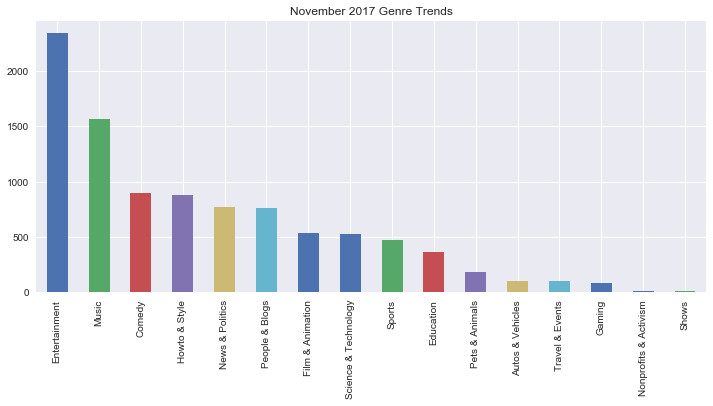

In [74]:
f = november2017['Genre'].value_counts().plot(kind='bar', title='November 2017 Genre Trends', figsize=(12,5))
plt.show()

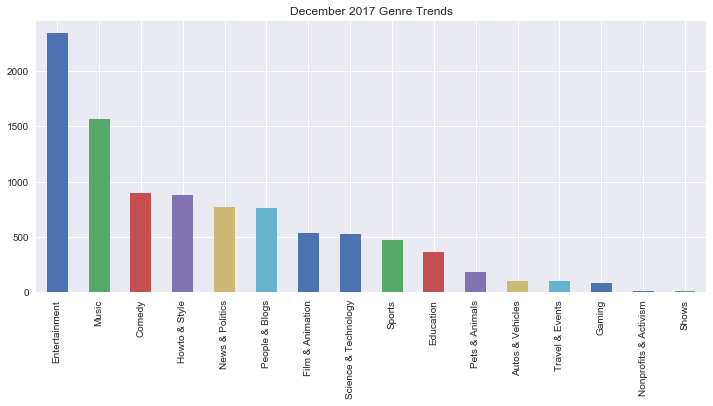

In [75]:
f = december2017['Genre'].value_counts().plot(kind='bar', title='December 2017 Genre Trends', figsize=(12,5))
plt.show()

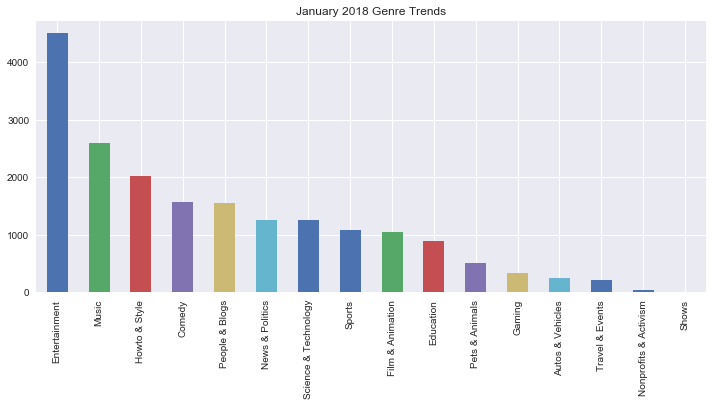

In [76]:
f = january2018['Genre'].value_counts().plot(kind='bar', title='January 2018 Genre Trends', figsize=(12,5))
plt.show()

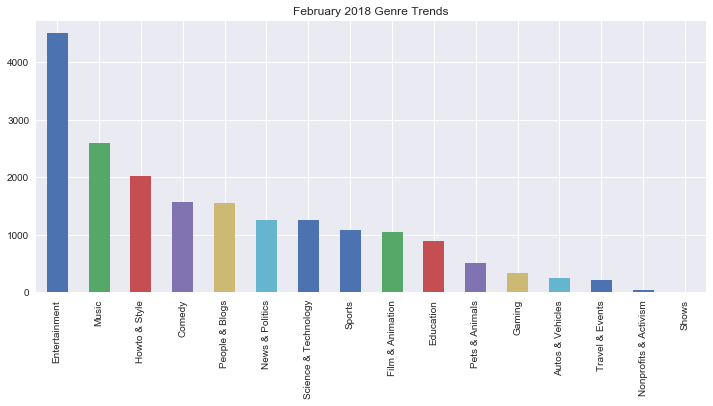

In [77]:
f = february2018['Genre'].value_counts().plot(kind='bar', title='February 2018 Genre Trends', figsize=(12,5))
plt.show()

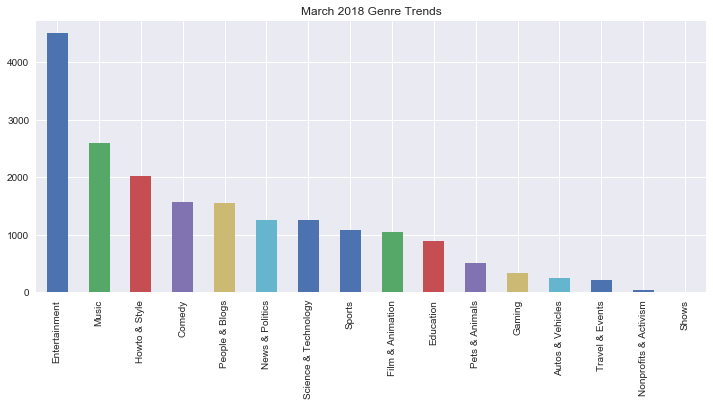

In [78]:
f = march2018['Genre'].value_counts().plot(kind='bar', title='March 2018 Genre Trends', figsize=(12,5))
plt.show()

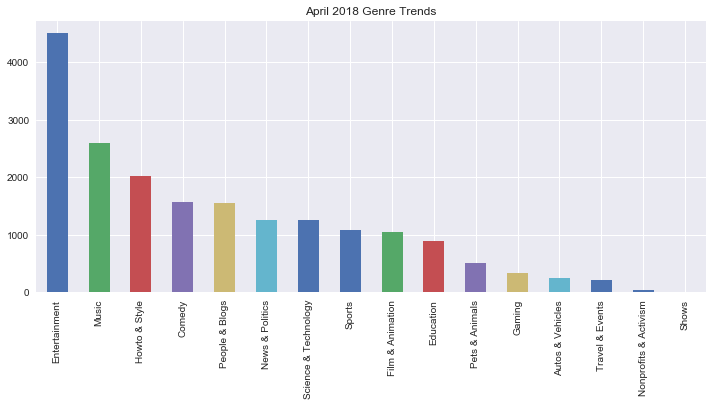

In [79]:
f = april2018['Genre'].value_counts().plot(kind='bar', title='April 2018 Genre Trends', figsize=(12,5))
plt.show()

In [82]:
multipleColumns = fullDf.groupby(['video_id']).size()

multipleColumns= multipleColumns.reset_index()

multipleColumns['days_trending']= multipleColumns[0]
multipleColumns = multipleColumns.drop(0,1)

DataWithTrendDays= pd.merge(fullDf , multipleColumns, left_on='video_id', right_on='video_id',how='left')


In [83]:
DataWithTrendDays

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
5      gHZ1Qz0KiKM    2017-11-14   
6      39idVpFF7NQ    2017-11-14   
7      nc99ccSXST0    2017-11-14   
8      jr9QtXwC9vc    2017-11-14   
9      TUmyygCMMGA    2017-11-14   
10     9wRQljFNDW8    2017-11-14   
11     VifQlJit6A0    2017-11-14   
12     5E4ZBSInqUU    2017-11-14   
13     GgVmn66oK_A    2017-11-14   
14     TaTleo4cOs8    2017-11-14   
15     kgaO45SyaO4    2017-11-14   
16     ZAQs-ctOqXQ    2017-11-14   
17     YVfyYrEmzgM    2017-11-14   
18     eNSN6qet1kE    2017-11-14   
19     B5HORANmzHw    2017-11-14   
20     vU14JY3x81A    2017-11-14   
21     6VhU_T463sU    2017-11-14   
22     _-aDHxoblr4    2017-11-14   
23     JBZTZZAcFTw    2017-11-14   
24     lZ68j2J_GOM    2017-11-14   
25     dRpNZV18N_g    2017-11-14   
26     fcVjitaM3LY    2017-11-14   
27     qeWvgZLz9yU    2017-11-14   
28     iIxy3JN3-jc    2017-11-14   
29     n30k5CwLhS4    2017-11-14   
30     U0hAC8O7RoI    2017-11-14   
31     CBVGjS_EJok    2017-11-14   
32     n1WpP7iowLc    2017-11-14   
33     hz7ukDjuq4w    2017-11-14   
34     p2hJxyF7mok    2017-11-14   
35     0mlNzVSJrT0    2017-11-14   
36     Om_zGhJLZ5U    2017-11-14   
37     e_7zHm7GsYc    2017-11-14   
38     dQvIbulWCM4    2017-11-14   
39     zZ9FciUx6gs    2017-11-14   
40     PaJCFHXcWmM    2017-11-14   
41     goP4Z5wyOlM    2017-11-14   
42     NZFhMSgbKKM    2017-11-14   
43     0tO_l_Ed5Rs    2017-11-14   
44     STI2fI7sKMo    2017-11-14   
45     BWPrk9PUwQE    2017-11-14   
46     ogYum4kWXgk    2017-11-14   
47     sbcbvuitiTc    2017-11-14   
48     zNqCVTs38nU    2017-11-14   
49     DM-ni_LSOFE    2017-11-14   
50     0PpNlNJ6Nng    2017-11-14   
51     c-3JxzN2u34    2017-11-14   
52     069D0NmW39o    2017-11-14   
53     9t9u_yPEidY    2017-11-14   
54     KODzih-pYlU    2017-11-14   
55     8NHA23f7LvU    2017-11-14   
56     w0XYVssCKjw    2017-11-14   
57     9XSULcLI6Hg    2017-11-14   
58     pjuPpVLXDQg    2017-11-14   
59     9xSx-5tmq44    2017-11-14   
60     4v0nOAzcG2A    2017-11-14   
61     oTObwUiXdYY    2017-11-14   
62     1cgK-BIrXes    2017-11-14   
63     ujyTQNNjjDU    2017-11-14   
64     PABlVzeldaM    2017-11-14   
65     6340tX9M_eM    2017-11-14   
66     8mhTWqWlQzU    2017-11-14   
67     t4YAyT4ihIQ    2017-11-14   
68     MNiweoKXwfg    2017-11-14   
69     Jw1Y-zhQURU    2017-11-14   
70     2Vv-BfVoq4g    2017-11-14   
71     UFYCTJlayS4    2017-11-14   
72     cccyOn99s4Y    2017-11-14   
73     abGCYPCk294    2017-11-14   
74     lY_0mkYDZDU    2017-11-14   
75     k8NxqyGcZA4    2017-11-14   
76     IE-xepGLVt8    2017-11-14   
77     ObIQ0s02UHg    2017-11-14   
78     cOc3tsFWoRs    2017-11-14   
79     AJYb0Yom5UQ    2017-11-14   
80     gLswXiRLdkA    2017-11-14   
81     MyEqfBkzESU    2017-11-14   
82     wJYE0sFOteE    2017-11-14   
83     L_5_slz4ke4    2017-11-14   
84     OKoL852K9uA    2017-11-14   
85     pa_oUisZZy0    2017-11-14   
86     fNtLIcyjsnI    2017-11-14   
87     _Iz83-Cmt6A    2017-11-14   
88     YlvCVbfS9M0    2017-11-14   
89     arJ5h2TY3I4    2017-11-14   
90     -2RVw2_QyxQ    2017-11-14   
91     gEHCXl4J9Qo    2017-11-14   
92     -OK9i1_YYYc    2017-11-14   
93     b4vTZx_AtHk    2017-11-14   
94     kOnQocd799Y    2017-11-14   
95     e4FApt6z55c    2017-11-14   
96     2XK4omx9uMU    2017-11-14   
97     xfmipNU4Odc    2017-11-14   
98     jp9hK-jY6yY    2017-11-14   
99     RkHuWjiR-LM    2017-11-14   
100    fCTKDn3Q8xQ    2017-11-14   
101    DIU3xPdhCBI    2017-11-14   
102    wnwF1FHybDQ    2017-11-14   
103    9oFP-pOMNwE    2017-11-14   
104    pz95u3UVpaM    2017-11-14   
105    g5c1bk8weaQ    2017-11-14   
106    yuBqWcSKrCk    2017-11-14   
107    x9mh-SwSKas    2017-11-14   
108    uiA4B5Y63IQ    2017-11-14   
109    viyRD5z6ilQ    2017-11-14   
110    QFfEtKv

### Plot correlations between days_trending and other features

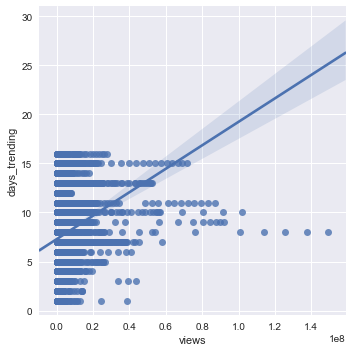

In [84]:
sns.lmplot(x='views', y='days_trending', data=DataWithTrendDays)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

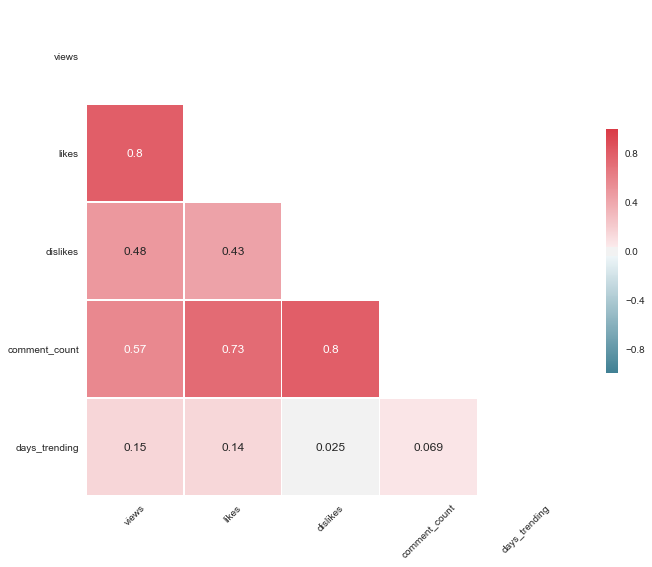

In [111]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
#USA_youtube_df = pd.read_csv("USvideos.csv")
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = DataWithTrendDays[['views','likes','dislikes','comment_count','timefromUploadToTrending','publish_timeOfDay','days_trending']].columns

# Calculate correlation of all pairs of continuous features
corr = DataWithTrendDays[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [40]:
DataWithTrendDays['days_trending'].min()

1

In [41]:
DataWithTrendDays['days_trending'].max()

16

In [42]:
DataWithTrendDays.shape

(28750, 22)

In [43]:
DataWithTrendDays.dtypes

video_id                             object
trending_date                datetime64[ns]
title                                object
channel_title                        object
tags                                 object
views                                 int64
likes                                 int64
dislikes                              int64
comment_count                         int64
comments_disabled                      bool
ratings_disabled                       bool
video_error_or_removed                 bool
description                          object
publish_hour                 datetime64[ns]
publish_date                         object
publish_timeOfDay                    object
Genre                                object
UploadYearMonth                       int64
timefromUploadToTrending    timedelta64[ns]
trending_month                        int64
trending_year                         int64
days_trending                         int64
dtype: object

### Linear regression on features

In [44]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm = sm.ols(formula="days_trending ~ + views + likes + dislikes + comment_count + comments_disabled + ratings_disabled + video_error_or_removed", data=DataWithTrendDays).fit()

# Print the model weights/parameters
print(lm.params)

Intercept                         7.251220e+00
comments_disabled[T.True]        -2.461139e-01
ratings_disabled[T.True]         -6.291015e-02
video_error_or_removed[T.True]   -2.585273e+00
views                             1.037384e-07
likes                             1.528209e-06
dislikes                         -7.041566e-06
comment_count                    -3.215950e-07
dtype: float64


In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          days_trending   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     117.1
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          2.96e-170
Time:                        17:40:33   Log-Likelihood:                -76138.
No. Observations:               28750   AIC:                         1.523e+05
Df Residuals:                   28742   BIC:                         1.524e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Split dataset into test and training

In [46]:
DataWithTrendDays.dtypes

video_id                             object
trending_date                datetime64[ns]
title                                object
channel_title                        object
tags                                 object
views                                 int64
likes                                 int64
dislikes                              int64
comment_count                         int64
comments_disabled                      bool
ratings_disabled                       bool
video_error_or_removed                 bool
description                          object
publish_hour                 datetime64[ns]
publish_date                         object
publish_timeOfDay                    object
Genre                                object
UploadYearMonth                       int64
timefromUploadToTrending    timedelta64[ns]
trending_month                        int64
trending_year                         int64
days_trending                         int64
dtype: object

In [47]:
df_y = DataWithTrendDays['days_trending']
# #Make df_X (all features except target feature- views)
df_X = DataWithTrendDays[['views','likes','dislikes','comment_count','comments_disabled', 'Genre','ratings_disabled','video_error_or_removed']]

In [48]:
df_X * 1

views    likes  dislikes  comment_count comments_disabled  \
0        748374    57527      2966          15954                 0   
1       2418783    97185      6146          12703                 0   
2       3191434   146033      5339           8181                 0   
3        343168    10172       666           2146                 0   
4       2095731   132235      1989          17518                 0   
5        119180     9763       511           1434                 0   
6       2103417    15993      2445           1970                 0   
7        817732    23663       778           3432                 0   
8        826059     3543       119            340                 0   
9        256426    12654      1363           2368                 0   
10        81377      655        25            177                 0   
11       104578     1576       303           1279                 0   
12       687582   114188      1333           8371                 0   
13       544770     7848      1171           3981                 0   
14       207532     7473       246           2120                 0   
15        75752     9419        52           1230                 0   
16       295639     8011       638           1256                 0   
17        78044     5398        53            385                 0   
18        97007    11963        36           2211                 0   
19       223871     8421       191           1214                 0   
20       115791     9586        75           2800                 0   
21       224019     3585       138            208                 0   
22       144418    11758        89           1014                 0   
23       145921     1707       578            673                 0   
24        33980     4884        52            234                 0   
25       223077     8676       193           1392                 0   
26        80705     4687        41            437                 0   
27       120727     9033       224           1346                 0   
28        27943      156        36             83                 0   
29        50867      715       238            246                 0   
30        98378     4035       495            486                 0   
31        26000      119        69              0                 1   
32     17158531   787419     43420         125882                 0   
33        67661     3781        84            626                 0   
34       141148     1661        70            236                 0   
35        98966     2486       184            532                 0   
36       288922     7515       792           2111                 0   
37        13917     1318        24             76                 0   
38       605932    38397      1387           3412                 0   
39        57169     6927       161            565                 0   
40        60506     5389       106            455                 0   
41        34785      308        26            413                 0   
42          945        7         5              8                 0   
43       328330    15186     15448           7484                 0   
44       321053     4451      1772            895                 0   
45      1456472    33505      1660           2160                 0   
46        69844     3417        33            160                 0   
47       956169     2017      2425           1447                 0   
48         4569       35        18             19                 0   
49      2045386    45406      2842           8309                 0   
50      1842393    99086      1339          11800                 0   
51         6473      205         6             15                 0   
52      1044813    15397       838           1100                 0   
53      9548677   190083     15015          11473                 0   
54       197062     7250       217            456                 0   
55      1496225    16116       236

In [49]:
df_X.isnull().values.any()

False

In [50]:
df_y.isnull().values.any()

False

In [51]:
#Randomly splitting into test and training -- random_state = 400 (setting seed for split function)
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 400)

In [52]:
# Creating a new training and test sets with only the required columns in them
#df_X_train_new = df_X_train[['views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','Genre_cat']]
#df_X_test_new = df_X_test[['views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','Genre_cat']]

In [53]:
#Create dataframe with only continuous features
df_X_train_cont = df_X_train[['views','likes','dislikes','comment_count']]

# Step 2: Create dummies for each of the ctegorical features
genre_dummies = pd.get_dummies(df_X_train.Genre, prefix='Genre_group')
comments_disabled_dummies = pd.get_dummies(df_X_train.comments_disabled, prefix='comments_disabled_Group')
ratings_disabled_dummies = pd.get_dummies(df_X_train.ratings_disabled, prefix='ratings_disabled_Group')
video_error_or_removed_dummies = pd.get_dummies(df_X_train.video_error_or_removed, prefix='video_error_or_removed_Group')

# Step 3: Concatenate all the dummies series with the continuous features dataframe
X_train_final = pd.concat([df_X_train_cont,genre_dummies,comments_disabled_dummies,ratings_disabled_dummies,video_error_or_removed_dummies], axis=1)
# X_train_final = pd.concat([age_dummies,handsetAge_dummies,lifeTime_dummies,numHandsets_dummies,smartPhone_dummies], axis=1)
X_train_final

views    likes  dislikes  comment_count  \
17813  12393755   198270     23450          31402   
16812    349033     4994        78            622   
20768   2311760    34425      6094           9453   
15070   4342804     3978       554           1175   
18801   3569857   165368      1991           7636   
10028    161543     2765       113            658   
25736    846892    40785       644           2140   
18090    499998    18803       206            834   
19024   2695075    29019      1094           6025   
5473      39403     2529        43            495   
25237   1687089    75725      1401           3216   
12003   2348594   100065      5129          27348   
12552    262553     5869       302            732   
20931     25096     2125        24            117   
27914   1327578    60226      1735           4138   
15120    558164    32980       416           3578   
17412    823042    26995      4571           2686   
11082    507085    41190       708           3889   
13216    803578    10231       383            489   
19651     49909      229       128             65   
21876    141285     4998       222            858   
14822     33042     1297        12             96   
1207     601839     6424       184            536   
16941   1110320     1370       731              0   
8343     409672    38244       490           3812   
23406   2174218   112838      1916           6099   
12368    852035    63867       443           3259   
8632      53541     3674        62            452   
26491   1709791    53246      9343           5577   
15096   2374161    74224      7365           7385   
22554    969660     6519       339           1115   
20414   1570667    40045      1291           2957   
872     2312628   148859      3720          13940   
14729    464324    31903       461           1528   
11546    203229      503       332            611   
19237   3842924   174042      2167           7998   
3096     383708    14197       790           1530   
10956   5791487   190827     10402          25452   
24950   7365395    98457     17797              0   
7343     634876    10616       237           1066   
24705    212441     6024       616            941   
15318    574085    33506       426           3665   
24085    230281    18664       363           1480   
24185   1392632    76341      3460           8657   
2165     626564    39140       696           5131   
5543     330656    17344       361            520   
19754   2004629    64947       560           2023   
2651     288379     3025       272            353   
18635     55532     2242       161            321   
20665    135687     1996       107            281   
20734    309550     3515       125            199   
18904    225661     1197        44            173   
4829     636501    35131       525           2977   
2197     132607      647        82              0   
3156     715905    22634       739           3225   
2602     332886    20045      2236           2910   
20105     84151      343        49             74   
21881     89152     3060       978           1025   
20978   1915013   180913      3177          25891   
6893      57840     3724        67            326   
6228      25313     1357        21            325   
2692     190994     1967        54            147   
28378    311280     1783       110            499   
22825    395448     3896        75            630   
7546      25669      715        20             66   
24210    805918    17033       399           1534   
1981    1105611    27738       854           4830   
13592    221336     6877       219           1538   
7685      16031      544        16            236   
27985    575459    49459       235           2386   
21552    126604     3204        48            152   
12440   3787041    30334      3303           3167   
9492      17494       55         4              6   
10454    484109    38955       502           1747   
22999    719602    10999       410 

In [58]:
#Standardisation
X_train_st = (X_train_final - X_train_final.mean()) / X_train_final.std()

In [59]:
X_train_st

views      likes  dislikes  comment_count  \
17813   2.519517   1.010114  0.658575       0.846883   
16812  -0.250494  -0.300985 -0.085952      -0.180963   
20768   0.200888  -0.101338  0.105691       0.113933   
15070   0.667982  -0.307877 -0.070788      -0.162497   
18801   0.490222   0.786921 -0.025012       0.053258   
10028  -0.293613  -0.316105 -0.084837      -0.179761   
25736  -0.135998  -0.058195 -0.067922      -0.130272   
18090  -0.215776  -0.207311 -0.081874      -0.173884   
19024   0.289042  -0.138010 -0.053587      -0.000539   
5473   -0.321702  -0.317706 -0.087067      -0.185204   
25237   0.057228   0.178823 -0.043807      -0.094341   
12003   0.209359   0.343935  0.074950       0.711507   
12552  -0.270383  -0.295049 -0.078816      -0.177290   
20931  -0.324992  -0.320447 -0.087672      -0.197827   
27914  -0.025451   0.073685 -0.033167      -0.063552   
15120  -0.202399  -0.111140 -0.075185      -0.082252   
17412  -0.141483  -0.151740  0.057175      -0.112039   
11082  -0.214146  -0.055447 -0.065883      -0.071867   
13216  -0.145959  -0.265459 -0.076236      -0.185404   
19651  -0.319286  -0.333308 -0.084359      -0.199563   
21876  -0.298272  -0.300958 -0.081365      -0.173082   
14822  -0.323165  -0.326064 -0.088054      -0.198528   
1207   -0.192355  -0.291284 -0.082575      -0.183835   
16941  -0.075416  -0.325568 -0.065150      -0.201734   
8343   -0.236549  -0.075432 -0.072827      -0.074438   
23406   0.169257   0.430581 -0.027401       0.001932   
12368  -0.134815   0.098383 -0.074324      -0.092905   
8632   -0.318451  -0.309939 -0.086461      -0.186640   
26491   0.062449   0.026335  0.209189      -0.015499   
15096   0.215239   0.168641  0.146179       0.044876   
22554  -0.107764  -0.290640 -0.077637      -0.164500   
20414   0.030454  -0.063214 -0.047311      -0.102990   
872     0.201088   0.674931  0.030066       0.263769   
14729  -0.223980  -0.118446 -0.073751      -0.150709   
11546  -0.284026  -0.331450 -0.077860      -0.181330   
19237   0.553021   0.845762 -0.019406       0.065346   
3096   -0.242520  -0.238556 -0.063271      -0.150642   
10956   1.001146   0.959624  0.242924       0.648193   
24950   1.363109   0.333027  0.478496      -0.201734   
7343   -0.184757  -0.262848 -0.080887      -0.166137   
24705  -0.281907  -0.293998 -0.068813      -0.170311   
15318  -0.198737  -0.107572 -0.074866      -0.079347   
24085  -0.277805  -0.208254 -0.076873      -0.152312   
24185  -0.010490   0.183002  0.021784       0.087352   
2165   -0.186669  -0.069353 -0.066265      -0.030393   
5543   -0.254721  -0.217208 -0.076937      -0.184369   
19754   0.130255   0.105710 -0.070597      -0.134179   
2651   -0.264443  -0.314342 -0.079772      -0.189946   
18635  -0.317993  -0.319653 -0.083308      -0.191015   
20665  -0.299559  -0.321322 -0.085028      -0.192350   
20734  -0.259575  -0.311018 -0.084454      -0.195089   
18904  -0.278867  -0.326742 -0.087035      -0.195957   
4829   -0.184383  -0.096549 -0.071712      -0.102322   
2197   -0.300267  -0.330473 -0.085824      -0.201734   
3156   -0.166122  -0.181323 -0.064895      -0.094040   
2602   -0.254208  -0.198885 -0.017208      -0.104559   
20105  -0.311411  -0.332535 -0.086876      -0.199263   
21881  -0.310261  -0.314104 -0.057282      -0.167506   
20978   0.109645   0.892371  0.012768       0.662853   
6893   -0.317462  -0.309600 -0.086302      -0.190848   
6228   -0.324943  -0.325657 -0.087767      -0.190881   
2692   -0.286840  -0.321519 -0.086716      -0.196825   
28378  -0.259177  -0.322767 -0.084932      -0.185071   
22825  -0.239820  -0.308433 -0.086047      -0.180696   
7546   -0.324861  -0.330012 -0.087799      -0.199530   
24210  -0.145421  -0.219318 -0.075726      -0.150508   
1981   -0.076499  -0.146700 -0.061232      -0.040444   
13592  -0.279862  -0.288211 -0.081460      -0.150375   
7685   -0.327077  -0.331172 -0.087927      -0.193853   
27985  -0.198422   0.000646 -0.080950      -0.122057   
21552  -0.301648  -0.313127 -0.0869

###  Linear Regression

**Training and Evaluation <font color="purple">Training Set</font>**

In [60]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train_st, df_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

7.453614906832298
[ 4.03797615e-01  2.24112889e-01 -2.08508287e-01  2.15696838e-02
 -9.71325500e-02  2.53398290e-02  2.37712766e-03 -2.24159617e-02
  1.29695188e-01  1.18173822e-01  1.39073069e-01  1.72170276e-01
 -2.84799452e-01 -1.34451924e-01 -1.26955114e-02 -3.86253579e-03
 -2.40910863e-02  1.48931919e-02 -2.37917133e-01  8.64916193e-02
 -2.31047005e-02  2.31047005e-02  3.23048226e-04 -3.23048226e-04
  1.73264565e-02 -1.73264565e-02]


In [62]:
# pair the feature names with the coefficients
list(zip(X_train_st, linreg.coef_))

[('views', 0.4037976148653126),
 ('likes', 0.2241128886773966),
 ('dislikes', -0.20850828704871108),
 ('comment_count', 0.021569683750558455),
 ('Genre_group_Autos & Vehicles', -0.09713254997709758),
 ('Genre_group_Comedy', 0.02533982899458665),
 ('Genre_group_Education', 0.0023771276614436704),
 ('Genre_group_Entertainment', -0.022415961694755696),
 ('Genre_group_Film & Animation', 0.12969518795050303),
 ('Genre_group_Gaming', 0.11817382234556614),
 ('Genre_group_Howto & Style', 0.13907306909110517),
 ('Genre_group_Music', 0.17217027611281288),
 ('Genre_group_News & Politics', -0.28479945173930693),
 ('Genre_group_Nonprofits & Activism', -0.13445192440111417),
 ('Genre_group_People & Blogs', -0.01269551138608245),
 ('Genre_group_Pets & Animals', -0.0038625357916161297),
 ('Genre_group_Science & Technology', -0.024091086322775165),
 ('Genre_group_Shows', 0.014893191900502171),
 ('Genre_group_Sports', -0.23791713324694955),
 ('Genre_group_Travel & Events', 0.08649161931582094),
 ('comme

In [63]:
#Training our model to learn from these descriptive features
X = sm.add_constant(X_train_st)
model = sm.OLS(df_y_train, X).fit()
print(model.params)

AttributeError: module 'statsmodels.formula.api' has no attribute 'add_constant'

In [64]:
print(lm.rsquared)

0.027729538638289752


In [74]:
print(model.summary())

NameError: name 'model' is not defined

# Prepare data for random forest

In [ ]:
fullDf['title'] = fullDf['title'].astype('str')
fullDf['description'] = fullDf['description'].astype('str')
fullDf['channel_title'] = fullDf['channel_title'].astype('str')
fullDf['titleLength']= fullDf['title'].str.len()
fullDf['descriptionLength'] = fullDf['description'].str.len()
fullDf['channel_titleLength'] = fullDf['channel_title'].str.len()
fullDf['comments_disabled']= fullDf['comments_disabled'].astype(int)
fullDf['ratings_disabled'] = fullDf['ratings_disabled'].astype(int)
fullDf['video_error_or_removed'] = fullDf['video_error_or_removed'].astype(int)
fullDf.head()

# Random Forest Model for views

In [ ]:
import statsmodels.formula.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ContFeat= fullDf[['UploadYearMonth', 'channel_titleLength', 'comments_disabled', 'channel_titleLength', 'descriptionLength', 'titleLength']]

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,  max_features='auto', oob_score=True, random_state=1)

In [ ]:
fullDf.views.mean()
ViewClassifier = (fullDf.views > 548904.608259977) * 1

In [ ]:
NewDataFrame= pd.concat([ViewClassifier, fullDf], axis=1)

In [ ]:
ContFeat= NewDataFrame[[ 'comments_disabled', 'channel_titleLength', 'descriptionLength', 'titleLength']]

In [ ]:
df_dummies_Genre = pd.get_dummies(NewDataFrame[['Genre']])
df_dummies_Genre.columns

In [ ]:
loo_df_dummies_genre = df_dummies_Genre[['Genre_Autos & Vehicles', 'Genre_Comedy', 'Genre_Education',
       'Genre_Entertainment', 'Genre_Film & Animation', 'Genre_Gaming',
       'Genre_Howto & Style', 'Genre_Music', 'Genre_News & Politics',
       'Genre_People & Blogs', 'Genre_Pets & Animals',
       'Genre_Science & Technology', 'Genre_Shows', 'Genre_Sports',
       'Genre_Trailers']]

In [ ]:
X= pd.concat([ContFeat, loo_df_dummies_genre], axis =1)
y= NewDataFrame['views'] 

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#rfc.fit(X_train, y_train)

In [ ]:
# scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), X, y, scoring='accuracy', cv=3)
# print(scores)
# print(scores.mean())